# SetUP

In [1]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/cleanData/rawMAT/humanBrain_1k_PFCV1_merge/")

In [2]:
suppressPackageStartupMessages({
library(dplyr)
library(tidyverse)
library(data.table)
library(ggplot2)
library(edgeR)
library(RColorBrewer)
library(GenomicRanges)
library(ComplexHeatmap)
library(Signac)
library(Seurat)
#library(rtracklayer)
#library(igraph)
})

In [3]:
mySubMat <- function(seq=seq,s=s,e=e,mat,res=res,...){
    dat <- mat%>% filter(seqnames==seq,V1>=s,V2<=e)%>% 
mutate(idl=((V1-s)/res)+1,idr=((V2-s)/res)+1)
    d <- max(dat$idr)
    plotDF <- matrix(0,nrow = d,ncol = d)
    for(i in 1:dim(dat)[1]){
    id1 <- dat[i,5]
    id2 <- dat[i,6]
    score <- dat[i,3]
    plotDF[id1,id2] <- score
    plotDF[id2,id1] <- score
}
return(plotDF)
}

In [6]:
hRG.50 <- lapply("14",function(idx){
    read.table(paste0("./RG.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/RG.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.50kb.mat")) %>%
    mutate(seqnames=idx) 
})

heN.50 <- lapply("14",function(idx){
    read.table(paste0("./eN.huamnBrain.PFCV1.1k.allValidPairs.hic.rawMAT/eN.huamnBrain.PFCV1.1k.allValidPairs.hic_",idx,"_NONE.50kb.mat")) %>%
    mutate(seqnames=idx) 
})


In [8]:
maRG.50 <- lapply("7",function(idx){
    read.table(paste0("../macacaBrain_1k/macacaBrain.all.1k.2batch.merge.RG.allValidPairs.hic.rawMAT/macacaBrain.all.1k.2batch.merge.RG.allValidPairs.hic_",idx,"_raw.50kb.mat")) %>%
    mutate(seqnames=idx) 
})

maeN.50 <- lapply("7",function(idx){
    read.table(paste0("../macacaBrain_1k/macacaBrain.all.1k.2batch.merge.eN.allValidPairs.hic.rawMAT/macacaBrain.all.1k.2batch.merge.eN.allValidPairs.hic_",idx,"_raw.50kb.mat")) %>%
    mutate(seqnames=idx) 
})


In [9]:
mRG.50 <- lapply("12",function(idx){
    read.table(paste0("../mouseBrain_1k/mouseBrain_1k_RG.allMerged.allValidPairs.hic.rawMAT/mouseBrain_1k_RG.allMerged.allValidPairs.hic_",idx,"_raw.50kb.mat")) %>%
    mutate(seqnames=idx) 
})

meN.50 <- lapply("12",function(idx){
    read.table(paste0("../mouseBrain_1k/mouseBrain_1k_eN.allMerged.allValidPairs.hic.rawMAT/mouseBrain_1k_eN.allMerged.allValidPairs.hic_",idx,"_raw.50kb.mat")) %>%
    mutate(seqnames=idx) 
})


In [10]:
hRG.50.mat <- do.call(rbind,hRG.50) %>% mutate(seqnames=paste0("chr",seqnames))
heN.50.mat <- do.call(rbind,heN.50) %>% mutate(seqnames=paste0("chr",seqnames))
hRG.50.mat <- hRG.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
heN.50.mat <- heN.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)

`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.


In [11]:
maRG.50.mat <- do.call(rbind,maRG.50) %>% mutate(seqnames=paste0("chr",seqnames))
maeN.50.mat <- do.call(rbind,maeN.50) %>% mutate(seqnames=paste0("chr",seqnames))
maRG.50.mat <- maRG.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
maeN.50.mat <- maeN.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)

`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.


In [12]:
mRG.50.mat <- do.call(rbind,mRG.50) %>% mutate(seqnames=paste0("chr",seqnames))
meN.50.mat <- do.call(rbind,meN.50) %>% mutate(seqnames=paste0("chr",seqnames))
mRG.50.mat <- mRG.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)
meN.50.mat <- meN.50.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)

`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.


# 50kcell

In [169]:
BeN.25 <- lapply("14",function(idx){
    read.table(paste0("../humanBrain_50k_control/eN.mergeAB.allValidPairs.hic.rawMAT/eN.mergeAB.allValidPairs.hic_",idx,"_NONE.50kb.mat")) %>%
    mutate(seqnames=idx) 
})

In [170]:
BeN.25.mat <- do.call(rbind,BeN.25) %>% mutate(seqnames=paste0("chr",seqnames))
BeN.25.mat <- BeN.25.mat %>% group_by(seqnames) %>% summarise(V1,V2,V3,seqnames,all=sum(V3)) %>% 
mutate(V3=V3/all*4000000) %>% as.data.frame() %>% select(V1,V2,V3,seqnames)

`summarise()` has grouped output by 'seqnames'. You can override using the `.groups` argument.


In [172]:
BeN <- mySubMat("chr14",81000000,89000000,BeN.25.mat,res=50000)

In [173]:
BeN[BeN<=4] <- 0
BeN[BeN>40] <- 40

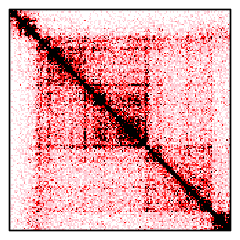

In [174]:
options(repr.plot.width=2,repr.plot.height=2)
Heatmap(BeN,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

## FLRT2

In [56]:
hRG <- mySubMat("chr14",81000000,89000000,hRG.50.mat,res=50000)
heN <- mySubMat("chr14",81000000,89000000,heN.50.mat,res=50000)
maRG <- mySubMat("chr7",142500000,151000000,maRG.50.mat,res=50000)
maeN <- mySubMat("chr7",142500000,151000000,maeN.50.mat,res=50000)
mRG <- mySubMat("chr12",91000000,99000000,mRG.50.mat,res=50000)
meN <- mySubMat("chr12",91000000,99000000,meN.50.mat,res=50000)

In [61]:
hRG[hRG<=4] <- 0
heN[heN<=4] <- 0
hRG[hRG>40] <- 40
heN[heN>40] <- 40
maRG[maRG>30] <- 30
maeN[maeN>30] <- 30
mRG[mRG>40] <- 40
meN[meN>40] <- 40

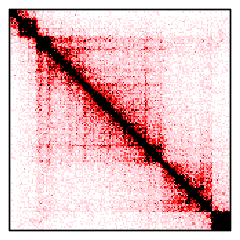

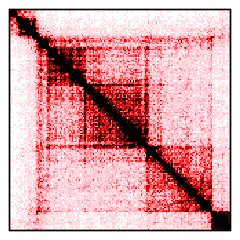

In [58]:
options(repr.plot.width=2,repr.plot.height=2)
Heatmap(hRG,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
Heatmap(heN,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

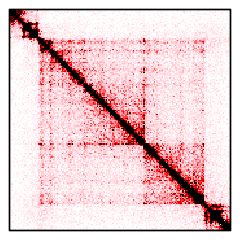

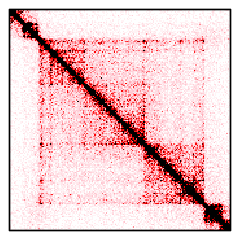

In [62]:
options(repr.plot.width=2,repr.plot.height=2)
Heatmap(maRG,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
Heatmap(maeN,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

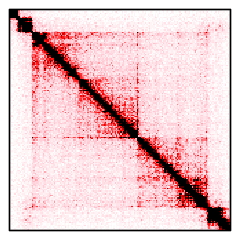

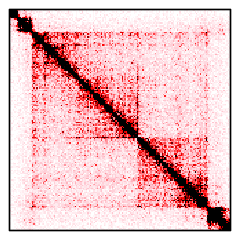

In [60]:
options(repr.plot.width=2,repr.plot.height=2)
Heatmap(mRG,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
Heatmap(meN,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))

In [84]:
options(repr.plot.width=2,repr.plot.height=2)
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.RG.chr3.50kb:50-65Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(RG.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iPC.chr3.50kb:50-65Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(iPC.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.eN.chr3.50kb:50-65Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(eN.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()
pdf("../../../FINAL_figures/fig1/Version2/humanBrain.iN.chr3.50kb:50-65Mb.legend:0-30.pdf",width = 2,height = 2)
Heatmap(iN.chr13.50,border = T,cluster_rows = F,cluster_columns = F,show_heatmap_legend = F,
        col = colorRampPalette(c("white","pink","red","black"))(500))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2